# Sparse Hebbian Learning 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

Extracting data..loading the data called : probe/cache_dir/data_data
Data is of shape : (65520, 196) - done in 0.08s.
No cache found probe/cache_dir/HULK_homeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   4097 (elapsed time:   0s,   0mn   0s)
Iteration  129 /   4097 (elapsed time:  27s,   0mn  27s)
Iteration  257 /   4097 (elapsed time:  52s,   0mn  52s)
Iteration  385 /   4097 (elapsed time:  67s,   1mn   7s)
Iteration  513 /   4097 (elapsed time:  78s,   1mn  18s)
Iteration  641 /   4097 (elapsed time:  88s,   1mn  28s)
Iteration  769 /   4097 (elapsed time:  99s,   1mn  39s)
Iteration  897 /   4097 (elapsed time:  109s,   1mn  49s)
Iteration  1025 /   4097 (elapsed time:  119s,   1mn  59s)
Iteration  1153 /   4097 (elapsed time:  129s,   2mn   9s)
Iteration  1281 /   4097 (elapsed time:  140s,   2mn  20s)
Iteration  1409 /   4097 (elapsed time:  150s,   2mn  30s)
Iteration  1537 /   4097 (elapsed time:  160s,   2mn  40s)
Iteration  1

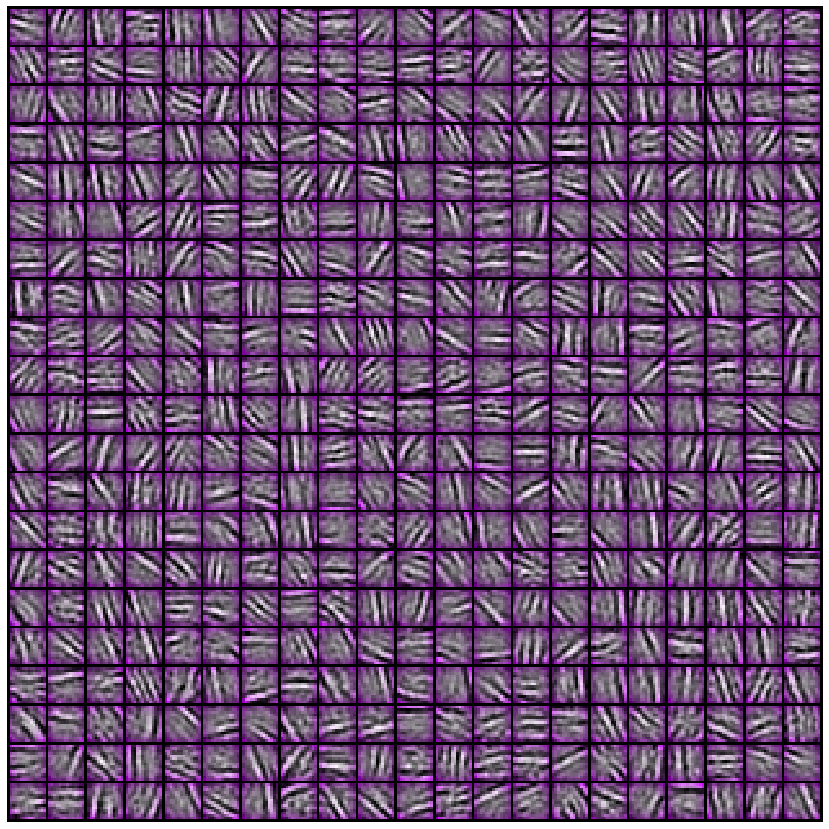

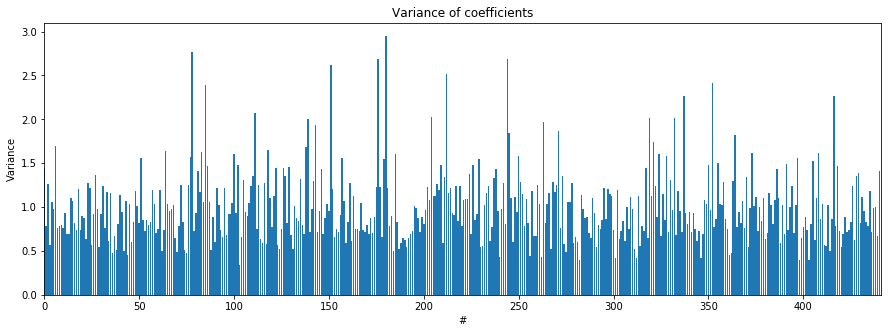

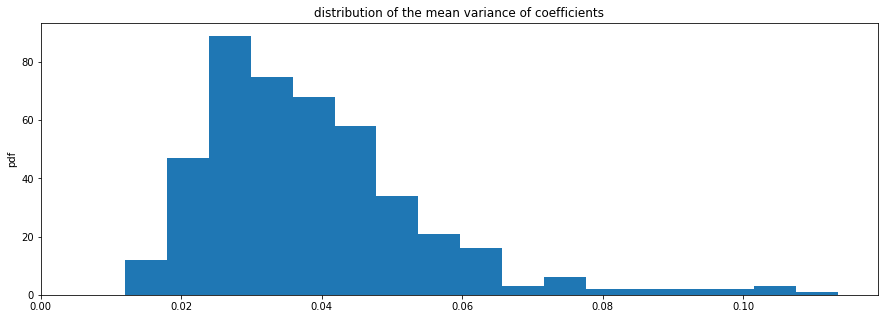

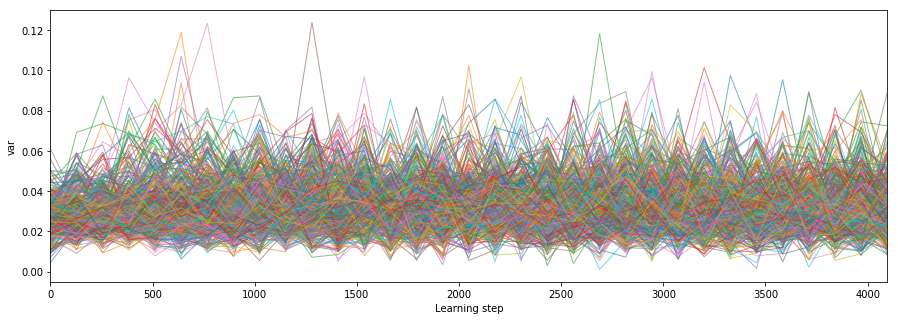

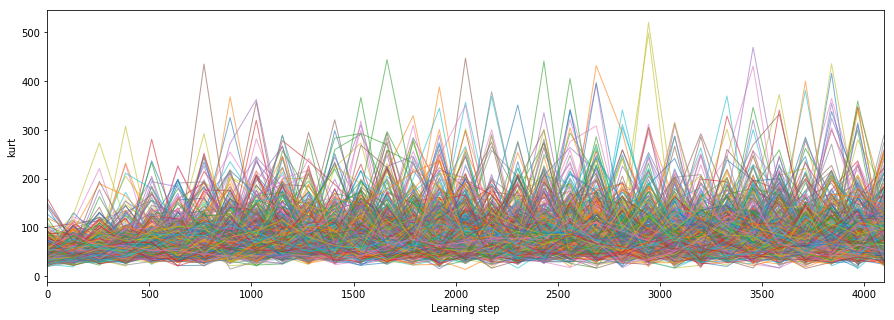

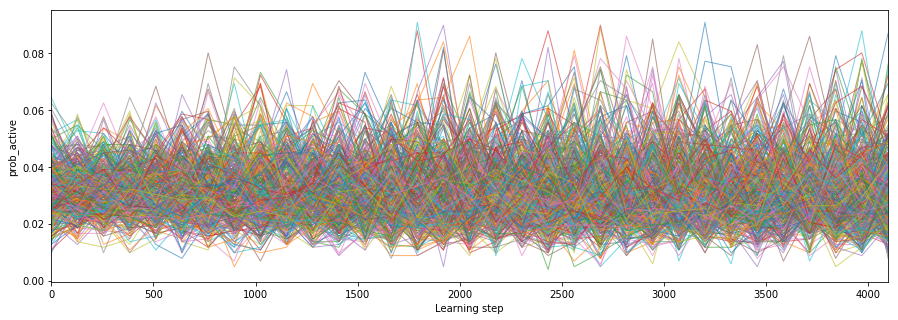

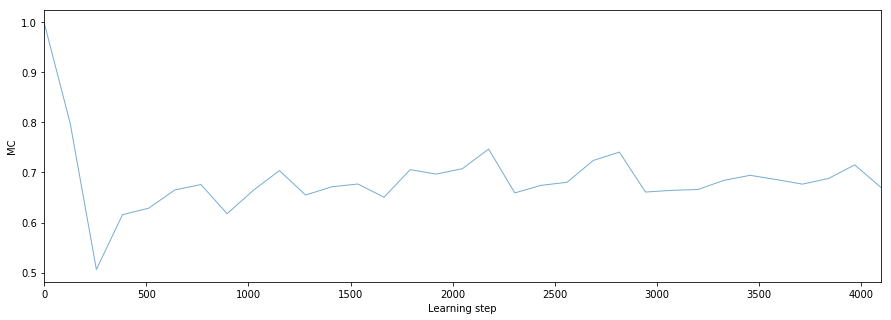

In [4]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var', 'time_plot_MC']
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose, cache_dir='probe/cache_dir', datapath='database')
shl = SHL(**opts)
tag = 'HULK'
data = shl.get_data(matname='data')
dico = shl.learn_dico(data=data, matname=tag + '_homeo', list_figures=list_figures)   

### control: learning without homeostasis

During the learning, to avoid divergence, the norm of the filters is shunted to $1$.

No cache found probe/cache_dir/HULK_nohomeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   4097 (elapsed time:   0s,   0mn   0s)
Iteration  129 /   4097 (elapsed time:  19s,   0mn  19s)
Iteration  257 /   4097 (elapsed time:  38s,   0mn  38s)
Iteration  385 /   4097 (elapsed time:  57s,   0mn  57s)
Iteration  513 /   4097 (elapsed time:  76s,   1mn  16s)
Iteration  641 /   4097 (elapsed time:  95s,   1mn  35s)
Iteration  769 /   4097 (elapsed time:  114s,   1mn  54s)
Iteration  897 /   4097 (elapsed time:  134s,   2mn  14s)
Iteration  1025 /   4097 (elapsed time:  153s,   2mn  33s)
Iteration  1153 /   4097 (elapsed time:  172s,   2mn  52s)
Iteration  1281 /   4097 (elapsed time:  191s,   3mn  11s)
Iteration  1409 /   4097 (elapsed time:  210s,   3mn  30s)
Iteration  1537 /   4097 (elapsed time:  229s,   3mn  49s)
Iteration  1665 /   4097 (elapsed time:  248s,   4mn   8s)
Iteration  1793 /   4097 (elapsed time:  267s,   4mn  27s)
Iteration

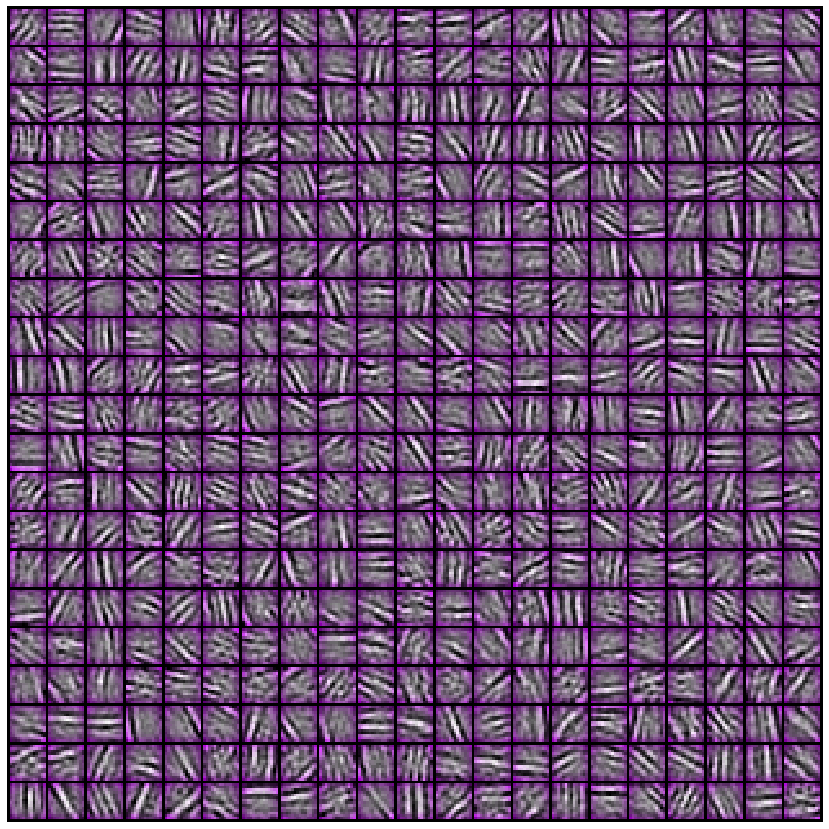

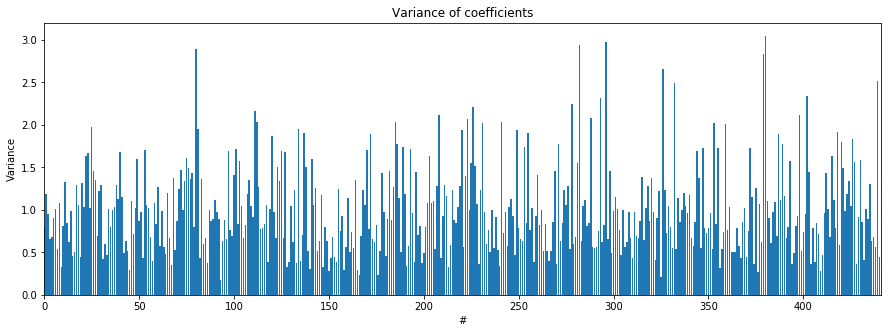

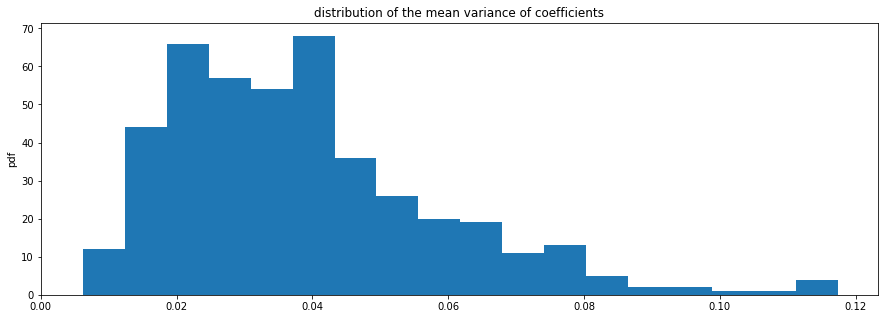

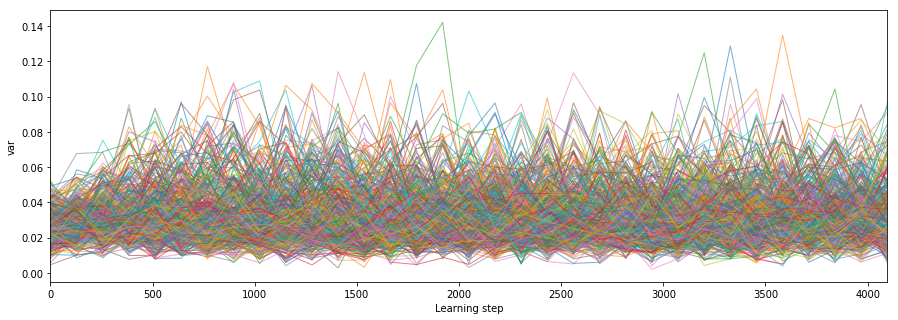

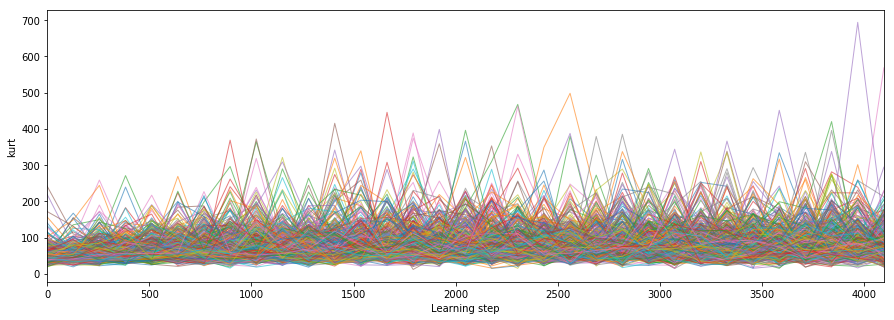

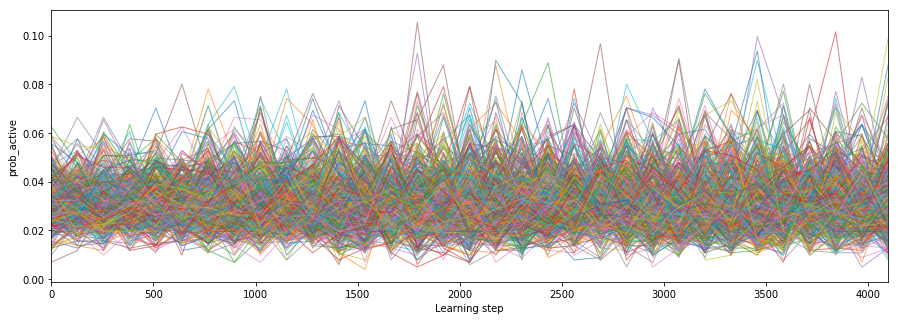

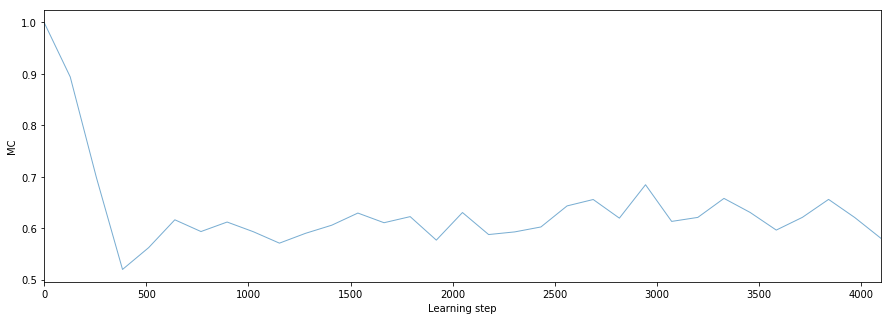

In [5]:
shl = SHL(homeo_method='None', **opts)
matname = tag + '_nohomeo'
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures) 

# Sparse Hebbian Learning : reproducing SparseNet

If we test the convergence of SparseNet as a function of different learning parameters, it shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters:

See :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the ``scikit-learn`` package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

## Version used

In [6]:
!rm -fr {shl.cache_dir}/{tag}*

In [7]:
!ls {shl.cache_dir}/HULK_*

ls: probe/cache_dir/HULK_*: No such file or directory


In [8]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 18.0.0 x86_64 i386 64bit
numpy 1.15.2
shl_scripts 20171221
Tue Sep 25 17:00:16 2018 CEST